In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [3]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [4]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [5]:
import os

model_name = os.getenv("MODEL_NAME")
data_path = os.getenv("LOGICAL_REASONING_DATA_PATH")
results_path = os.getenv("LOGICAL_REASONING_RESULTS_PATH")
max_new_tokens = int(os.getenv("MAX_NEW_TOKENS", 2048))

print(model_name, data_path, results_path, max_new_tokens)

shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat datasets/mgtv data/open_source_models_few_shots_results.csv 2048


In [6]:
from llm_toolkit.logical_reasoning_utils import *

loading /Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py


In [7]:
model_names = {
    "gpt-4o-mini": "gpt-4o-mini",
    "gpt-4o": "gpt-4o",
    "o1-mini": "o1-mini",
    "o1-preview": "o1-preview",
    "Llama3.1-8B-Chinese-Chat": "Llama3.1-8B",
    "Llama3.1-70B-Chinese-Chat": "Llama3.1-70B",
    "Mistral-7B-v0.3-Chinese-Chat": "Mistral-7B",
    "internlm2_5-7b-chat": "InternLM2.5-7B",
    "internlm2_5-7b-chat-1m": "InternLM2.5-7B-1M",
    "internlm2_5-20b-chat": "InternLM2.5-20B",
    "Qwen2.5-0.5B-Instruct": "Qwen2.5-0.5B",
    "Qwen2.5-1.5B-Instruct": "Qwen2.5-1.5B",
    "Qwen2.5-3B-Instruct": "Qwen2.5-3B",
    "Qwen2.5-7B-Instruct": "Qwen2.5-7B",
    "Qwen2.5-72B-Instruct": "Qwen2.5-72B",
}

In [9]:
model_orders = {k: i for i, k in enumerate(model_names.keys()) if i > 3}
model_orders

{'Llama3.1-8B-Chinese-Chat': 4,
 'Llama3.1-70B-Chinese-Chat': 5,
 'Mistral-7B-v0.3-Chinese-Chat': 6,
 'internlm2_5-7b-chat': 7,
 'internlm2_5-7b-chat-1m': 8,
 'internlm2_5-20b-chat': 9,
 'Qwen2.5-0.5B-Instruct': 10,
 'Qwen2.5-1.5B-Instruct': 11,
 'Qwen2.5-3B-Instruct': 12,
 'Qwen2.5-7B-Instruct': 13,
 'Qwen2.5-72B-Instruct': 14}

In [10]:
markers = [
    "o",
    "x",
    "^",
    "s",
    "d",
    "P",
    "X",
    "*",
    "v",
    ">",
    "<",
    "p",
    "h",
    "H",
    "+",
    "|",
    "_",
]
model_markers = {k: markers[i] for i, k in enumerate(model_orders.keys())}

In [11]:
import pandas as pd

perf_df = None
model_perf_dfs = {}
for model_name in model_orders.keys():
    metrics_csv = f"data/{model_name}_shots_metrics.csv"
    if not Path(metrics_csv).exists():
        print(f"metrics file not found: {metrics_csv}")
        continue
    df = pd.read_csv(metrics_csv)
    model_perf_dfs[model_name] = df
    perf_df = df if perf_df is None else pd.concat([perf_df, df])

perf_df

shots                     model  \
0       0  Llama3.1-8B-Chinese-Chat   
1       5  Llama3.1-8B-Chinese-Chat   
2      10  Llama3.1-8B-Chinese-Chat   
3      20  Llama3.1-8B-Chinese-Chat   
4      30  Llama3.1-8B-Chinese-Chat   
..    ...                       ...   
4      30       Qwen2.5-7B-Instruct   
5      40       Qwen2.5-7B-Instruct   
6      50       Qwen2.5-7B-Instruct   
0       0      Qwen2.5-72B-Instruct   
1       5      Qwen2.5-72B-Instruct   

                                               run  accuracy  precision  \
0   shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-00  0.734333   0.737575   
1   shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-05  0.705667   0.750852   
2   shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-10  0.673667   0.777600   
3   shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-20  0.767000   0.764983   
4   shenzhi-wang/Llama3.1-8B-Chinese-Chat/shots-30  0.771333   0.772569   
..                                             ...       ...        ...   
4                Qwen/Qwen2.5-7B-Instruct/shots-30  0.764667   0.778792   
5                Qwen/Qwen2.5-7B-Instruct/shots-40  0.759000   0.773685   
6                Qwen/Qwen2.5-7B-Instruct/shots-50  0.758667   0.764043   
0               Qwen/Qwen2.5-72B-Instruct/shots-00  0.795667   0.809807   
1               Qwen/Qwen2.5-72B-Instruct/shots-05  0.819000   0.818232   

      recall        f1  ratio_valid_classifications  
0   0.734333  0.727028                     0.803333  
1   0.705667  0.723057                     0.988667  
2   0.673667  0.709410                     0.962333  
3   0.767000  0.763847                     0.979000  
4   0.771333  0.769269                     0.732667  
..       ...       ...                          ...  
4   0.764667  0.752765                     0.805000  
5   0.759000  0.747225                     0.854667  
6   0.758667  0.741433                     0.756333  
0   0.795667  0.777132                     0.994000  
1   0.819000  0.809537                     0.941667  

[62 rows x 8 columns]

In [12]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


def plot_perf(
    model_perf_dfs,
    model_markers,
    x_major_locator=5,
    y_offset=0.005,
    variant="shots"
):
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))

    for model_name, perf_df in model_perf_dfs.items():
        # Ensure the lengths of perf_df["epoch"], perf_df["accuracy"], and perf_df["f1"] are the same
        min_length = min(
            len(perf_df[variant]), len(perf_df["accuracy"]), len(perf_df["f1"])
        )
        perf_df = perf_df.iloc[:min_length]

        (line,) = ax.plot(
            perf_df[variant],
            perf_df["f1"],
            marker=model_markers[model_name],
            label=model_name,
        )

        line_color = line.get_color()

        best_f1 = perf_df["f1"].idxmax()
        print(
            f"Best F1 for {model_name} @ {perf_df[variant].iloc[best_f1]:.2f} {variant}: {perf_df['f1'].iloc[best_f1]}"
        )
        ax.annotate(
            f"{perf_df['f1'].iloc[best_f1]*100:.2f}%",
            (perf_df[variant].iloc[best_f1], perf_df["f1"].iloc[best_f1]),
            ha="center",
            va="bottom",
            xytext=(0, 0),
            textcoords="offset points",
            fontsize=10,
            color=line_color,
        )

    # Set y-axis limit
    y_scales = ax.get_ylim()
    ax.set_ylim(y_scales[0], y_scales[1] + y_offset)

    # Add title and labels
    ax.set_xlabel("Number of Shots")
    ax.set_ylabel("F1 Score")

    # Set x-axis grid spacing to 0.2
    ax.xaxis.set_major_locator(MultipleLocator(x_major_locator))
    ax.set_title("Performance Analysis Across Shots for Models")

    # Rotate x labels
    plt.xticks(rotation=0)
    plt.grid(True)
    # plt.tight_layout()

    # Set legend at the right to avoid overlapping with lines
    plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

    plt.show()

Best F1 for Llama3.1-8B-Chinese-Chat @ 30.00 shots: 0.7692692690410152
Best F1 for Llama3.1-70B-Chinese-Chat @ 30.00 shots: 0.7570501796584528
Best F1 for Mistral-7B-v0.3-Chinese-Chat @ 30.00 shots: 0.6872462947319797
Best F1 for internlm2_5-7b-chat @ 5.00 shots: 0.7232456014841266
Best F1 for internlm2_5-7b-chat-1m @ 5.00 shots: 0.7665405919258307
Best F1 for internlm2_5-20b-chat @ 0.00 shots: 0.6416875854199033
Best F1 for Qwen2.5-0.5B-Instruct @ 50.00 shots: 0.5069942984615308
Best F1 for Qwen2.5-1.5B-Instruct @ 10.00 shots: 0.459589777544246
Best F1 for Qwen2.5-3B-Instruct @ 50.00 shots: 0.6451959368825358
Best F1 for Qwen2.5-7B-Instruct @ 30.00 shots: 0.7527649874769439
Best F1 for Qwen2.5-72B-Instruct @ 5.00 shots: 0.8095367865845521


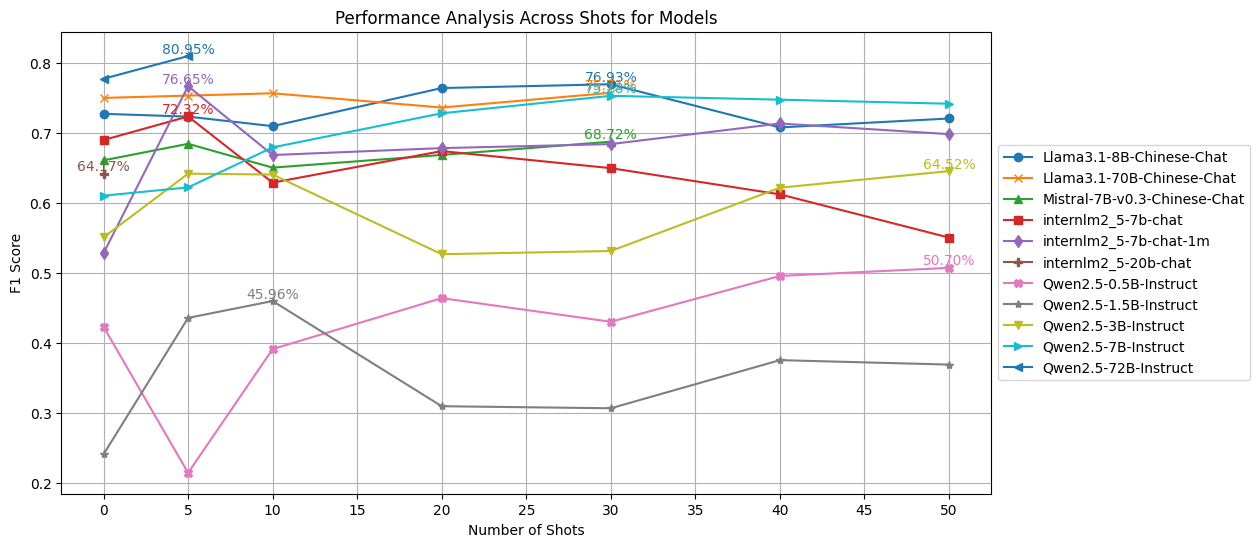

In [13]:
plot_perf(model_perf_dfs, model_markers)

In [14]:
from transformers import (
    AutoTokenizer,
)

from llm_toolkit.llm_utils import print_row_details

model_test_dfs = {}

for num_shots in [0, 5, 10, 20, 30, 40, 50]:
    for model_name in model_orders.keys():
        model_id = (
            model_perf_dfs[model_name]["run"].unique()[0].split(model_name)[0]
            + model_name
        )
        tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)

        datasets = load_logical_reasoning_dataset(
            data_path,
            tokenizer=tokenizer,
            chinese_prompt=True,
            using_p1=False,
            num_shots=num_shots,
        )
        print(f"Model: {model_name}, Shots: {num_shots}")
        test_df = datasets["test"].to_pandas()
        test_df["num_tokens"] = test_df["prompt"].apply(
            lambda x: len(tokenizer(x)["input_ids"])
        )
        
        print(test_df["num_tokens"].describe())

        model_test_dfs[(model_name, num_shots)] = test_df

loading train/test data files
DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Llama3.1-8B-Chinese-Chat, Shots: 0
count    3000.000000
mean      571.091000
std         9.115687
min       512.000000
25%       570.000000
50%       571.000000
75%       574.000000
max       652.000000
Name: num_tokens, dtype: float64
loading train/test data files
DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Llama3.1-70B-Chinese-Chat, Shots: 0
count    3000.000000
mean      571.091000
std         9.1156

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Qwen2.5-0.5B-Instruct, Shots: 10
count    3000.000000
mean     2237.338667
std         8.617118
min      2198.000000
25%      2234.000000
50%      2236.000000
75%      2239.000000
max      2289.000000
Name: num_tokens, dtype: float64
loading train/test data files


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Qwen2.5-1.5B-Instruct, Shots: 10
count    3000.000000
mean     2237.338667
std         8.617118
min      2198.000000
25%      2234.000000
50%      2236.000000
75%      2239.000000
max      2289.000000
Name: num_tokens, dtype: float64
loading train/test data files


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Qwen2.5-3B-Instruct, Shots: 10
count    3000.000000
mean     2237.338667
std         8.617118
min      2198.000000
25%      2234.000000
50%      2236.000000
75%      2239.000000
max      2289.000000
Name: num_tokens, dtype: float64
loading train/test data files
DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Qwen2.5-7B-Instruct, Shots: 10
count    3000.000000
mean     2237.338667
std         8.617118
min      2198.000000
25%      2234.0

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Qwen2.5-0.5B-Instruct, Shots: 20
count    3000.000000
mean     4124.338667
std         8.617118
min      4085.000000
25%      4121.000000
50%      4123.000000
75%      4126.000000
max      4176.000000
Name: num_tokens, dtype: float64
loading train/test data files


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Qwen2.5-1.5B-Instruct, Shots: 20
count    3000.000000
mean     4124.338667
std         8.617118
min      4085.000000
25%      4121.000000
50%      4123.000000
75%      4126.000000
max      4176.000000
Name: num_tokens, dtype: float64
loading train/test data files


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Qwen2.5-3B-Instruct, Shots: 20
count    3000.000000
mean     4124.338667
std         8.617118
min      4085.000000
25%      4121.000000
50%      4123.000000
75%      4126.000000
max      4176.000000
Name: num_tokens, dtype: float64
loading train/test data files
DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Qwen2.5-7B-Instruct, Shots: 20
count    3000.000000
mean     4124.338667
std         8.617118
min      4085.000000
25%      4121.0

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Qwen2.5-0.5B-Instruct, Shots: 30
count    3000.000000
mean     6055.338667
std         8.617118
min      6016.000000
25%      6052.000000
50%      6054.000000
75%      6057.000000
max      6107.000000
Name: num_tokens, dtype: float64
loading train/test data files


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Qwen2.5-1.5B-Instruct, Shots: 30
count    3000.000000
mean     6055.338667
std         8.617118
min      6016.000000
25%      6052.000000
50%      6054.000000
75%      6057.000000
max      6107.000000
Name: num_tokens, dtype: float64
loading train/test data files


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Qwen2.5-3B-Instruct, Shots: 30
count    3000.000000
mean     6055.338667
std         8.617118
min      6016.000000
25%      6052.000000
50%      6054.000000
75%      6057.000000
max      6107.000000
Name: num_tokens, dtype: float64
loading train/test data files
DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Qwen2.5-7B-Instruct, Shots: 30
count    3000.000000
mean     6055.338667
std         8.617118
min      6016.000000
25%      6052.0

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Qwen2.5-0.5B-Instruct, Shots: 40
count    3000.000000
mean     7958.338667
std         8.617118
min      7919.000000
25%      7955.000000
50%      7957.000000
75%      7960.000000
max      8010.000000
Name: num_tokens, dtype: float64
loading train/test data files


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Qwen2.5-1.5B-Instruct, Shots: 40
count    3000.000000
mean     7958.338667
std         8.617118
min      7919.000000
25%      7955.000000
50%      7957.000000
75%      7960.000000
max      8010.000000
Name: num_tokens, dtype: float64
loading train/test data files


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Qwen2.5-3B-Instruct, Shots: 40
count    3000.000000
mean     7958.338667
std         8.617118
min      7919.000000
25%      7955.000000
50%      7957.000000
75%      7960.000000
max      8010.000000
Name: num_tokens, dtype: float64
loading train/test data files
DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Qwen2.5-7B-Instruct, Shots: 40
count    3000.000000
mean     7958.338667
std         8.617118
min      7919.000000
25%      7955.0

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Qwen2.5-0.5B-Instruct, Shots: 50
count    3000.000000
mean     9909.338667
std         8.617118
min      9870.000000
25%      9906.000000
50%      9908.000000
75%      9911.000000
max      9961.000000
Name: num_tokens, dtype: float64
loading train/test data files


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Qwen2.5-1.5B-Instruct, Shots: 50
count    3000.000000
mean     9909.338667
std         8.617118
min      9870.000000
25%      9906.000000
50%      9908.000000
75%      9911.000000
max      9961.000000
Name: num_tokens, dtype: float64
loading train/test data files


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Qwen2.5-3B-Instruct, Shots: 50
count    3000.000000
mean     9909.338667
std         8.617118
min      9870.000000
25%      9906.000000
50%      9908.000000
75%      9911.000000
max      9961.000000
Name: num_tokens, dtype: float64
loading train/test data files
DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth', 'train_text', 'prompt'],
        num_rows: 3000
    })
})
Model: Qwen2.5-7B-Instruct, Shots: 50
count    3000.000000
mean     9909.338667
std         8.617118
min      9870.000000
25%      9906.0

In [15]:
import tiktoken


def num_tokens_from_text(text, model="gpt-4o"):
    """Return the number of tokens used by a list of messages."""
    try:
        encoding = tiktoken.encoding_for_model(model)
    except KeyError:
        # print("Warning: model not found. Using cl100k_base encoding.")
        encoding = tiktoken.get_encoding("cl100k_base")

    return len(encoding.encode(text))


def num_tokens_from_row(row, num_shots, train_dataset, model="gpt-4o"):
    prompt = get_few_shot_prompt_template(
        num_shots, train_dataset
    )
    text = prompt.format(row["puzzle"], row["truth"], row["text"])
    return num_tokens_from_text(text, model=model)

In [16]:
for num_shots in [0, 5, 10, 20, 30, 40, 50]:
    for model_name in ["gpt-4o", "gpt-4o-mini", "o1-preview", "o1-mini"]:

        datasets = load_logical_reasoning_dataset(
            data_path,
        )
        print(f"Model: {model_name}, Shots: {num_shots}")
        test_df = datasets["test"].to_pandas()
        # print_row_details(test_df)
        test_df["num_tokens"] = test_df.apply(
            lambda x: num_tokens_from_row(x, num_shots, datasets["train"].to_pandas(), model=model_name), axis=1
        )
        print(test_df["num_tokens"].describe())

        model_test_dfs[(model_name, num_shots)] = test_df

loading train/test data files
DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth'],
        num_rows: 3000
    })
})
Model: gpt-4o, Shots: 0
count    3000.000000
mean      524.806333
std        10.057595
min       464.000000
25%       522.000000
50%       525.000000
75%       528.250000
max       606.000000
Name: num_tokens, dtype: float64
loading train/test data files
DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'title', 'puzzle', 'truth'],
        num_rows: 3000
    })
})
Model: gpt-4o-mini, Shots: 0
count    3000.000000
mean      524.806333
std        10.057595
min       464.000000
25%       522.000000
50%       525.000000
75%       528.250000
max       606.000000
Name: num_tokens, dt

In [17]:
df_token_counts = pd.DataFrame(
    model_test_dfs.keys(), columns=["model_name", "num_shots"]
)

max = []
min = []
mean = []
std = []

for model_name, num_shots in model_test_dfs.keys():
    test_df = model_test_dfs[(model_name, num_shots)]
    max.append(test_df["num_tokens"].max())
    min.append(test_df["num_tokens"].min())
    mean.append(test_df["num_tokens"].mean())
    std.append(test_df["num_tokens"].std())

df_token_counts["max"] = max
df_token_counts["min"] = min
df_token_counts["mean"] = mean
df_token_counts["std"] = std

df_token_counts.head(10)

model_name  num_shots  max  min        mean        std
0      Llama3.1-8B-Chinese-Chat          0  652  512  571.091000   9.115687
1     Llama3.1-70B-Chinese-Chat          0  652  512  571.091000   9.115687
2  Mistral-7B-v0.3-Chinese-Chat          0  928  694  799.354000  15.567385
3           internlm2_5-7b-chat          0  511  426  461.917667   7.767732
4        internlm2_5-7b-chat-1m          0  511  426  461.917667   7.767732
5          internlm2_5-20b-chat          0  511  426  461.917667   7.767732
6         Qwen2.5-0.5B-Instruct          0  517  426  465.338667   8.617118
7         Qwen2.5-1.5B-Instruct          0  517  426  465.338667   8.617118
8           Qwen2.5-3B-Instruct          0  517  426  465.338667   8.617118
9           Qwen2.5-7B-Instruct          0  517  426  465.338667   8.617118

In [18]:
df_token_counts

model_name  num_shots    max    min          mean  \
0        Llama3.1-8B-Chinese-Chat          0    652    512    571.091000   
1       Llama3.1-70B-Chinese-Chat          0    652    512    571.091000   
2    Mistral-7B-v0.3-Chinese-Chat          0    928    694    799.354000   
3             internlm2_5-7b-chat          0    511    426    461.917667   
4          internlm2_5-7b-chat-1m          0    511    426    461.917667   
..                            ...        ...    ...    ...           ...   
100                       o1-mini         40  15061  14818  14933.595333   
101                        gpt-4o         50  12476  12334  12394.806333   
102                   gpt-4o-mini         50  12476  12334  12394.806333   
103                    o1-preview         50  18760  18517  18632.595333   
104                       o1-mini         50  18760  18517  18632.595333   

           std  
0     9.115687  
1     9.115687  
2    15.567385  
3     7.767732  
4     7.767732  
..         ...  
100  16.417250  
101  10.057595  
102  10.057595  
103  16.417250  
104  16.417250  

[105 rows x 6 columns]

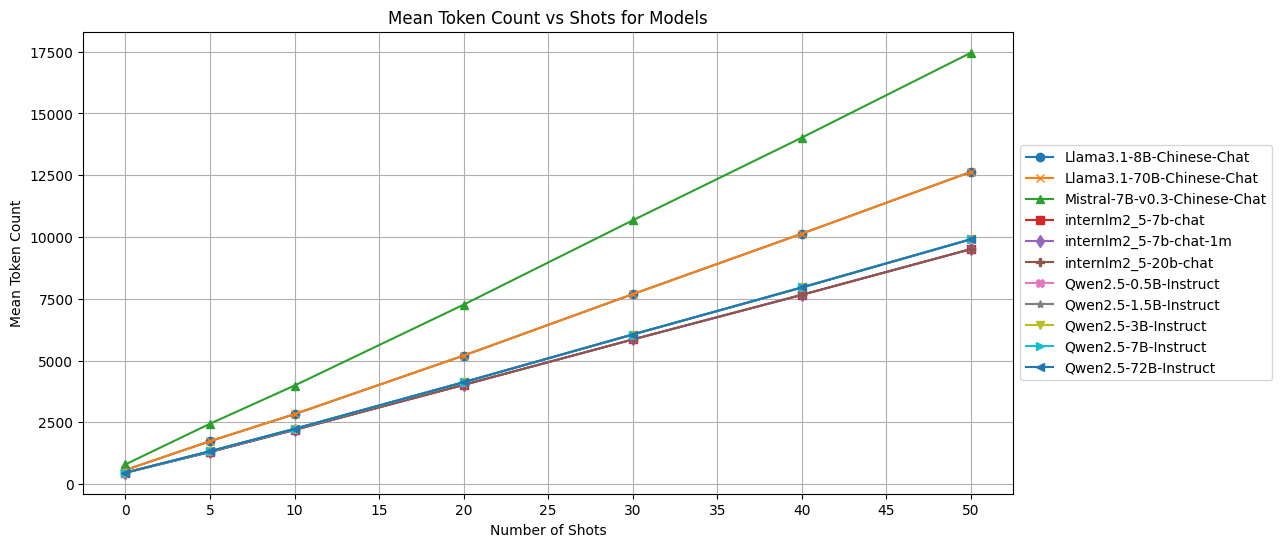

In [28]:
# plot mean/std of token counts vs shots for each model
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

for model_name in model_orders.keys():
    model_df = df_token_counts[df_token_counts["model_name"] == model_name]
    # ax.errorbar(
    #     model_df["num_shots"],
    #     model_df["mean"],
    #     yerr=model_df["std"],
    #     marker=model_markers[model_name],
    #     label=model_name,
    #     fmt='o',  # Format of the marker
    #     capsize=5,  # Length of the error bar caps
    #     capthick=2,  # Thickness of the error bar caps
    #     elinewidth=2,  # Thickness of the error bars
    # )

    # Connect mean dots with lines
    ax.plot(
        model_df["num_shots"],
        model_df["mean"],
        marker=model_markers[model_name],
        label=model_name,
    )

# Add title and labels
ax.set_xlabel("Number of Shots")
ax.set_ylabel("Mean Token Count")
ax.set_title("Mean Token Count vs Shots for Models")

# Set x-axis grid spacing to 5
ax.xaxis.set_major_locator(MultipleLocator(5))

# Rotate x labels
plt.xticks(rotation=0)
plt.grid(True)
# plt.tight_layout()

# Set legend at the right to avoid overlapping with lines
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

plt.show()

In [20]:
df_token_counts.to_csv("data/all_model_token_counts.csv", index=False)